# Purpose

Use the epileptic seizure dataset from the UCI Machine Learning repository to explore the implementation of PCA using sklearn. 

Find the optimal number of PC's to use for the KNN algorithm. 

Compare results of KNN using 1) Principal Components vs 2) Subset of Features as inputs.

# Imports

In [5]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

# Randomization
import random

# Obtain

In [6]:
# Load and check data

df = pd.read_csv('data.csv')
display(df.head())

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135.0,190.0,229.0,223.0,192.0,125.0,55.0,-9.0,-33.0,...,-17.0,-15.0,-31.0,-77.0,-103.0,-127.0,-116.0,-83.0,-51.0,4.0
1,X15.V1.924,386.0,382.0,356.0,331.0,320.0,315.0,307.0,272.0,244.0,...,164.0,150.0,146.0,152.0,157.0,156.0,154.0,143.0,129.0,1.0
2,X8.V1.1,-32.0,-39.0,-47.0,-37.0,-32.0,-36.0,-57.0,-73.0,-85.0,...,57.0,64.0,48.0,19.0,-12.0,-30.0,-35.0,-35.0,-36.0,5.0
3,X16.V1.60,-105.0,-101.0,-96.0,-92.0,-89.0,-95.0,-102.0,-100.0,-87.0,...,-82.0,-81.0,-80.0,-77.0,-85.0,-77.0,-72.0,-69.0,-65.0,5.0
4,X20.V1.54,-9.0,-65.0,-98.0,-102.0,-78.0,-48.0,-16.0,0.0,-21.0,...,4.0,2.0,-12.0,-32.0,-41.0,-65.0,-83.0,-89.0,-73.0,5.0


# Scrub

In [7]:
# Drop first column of id information

df = df.drop('Unnamed: 0', axis=1)

In [8]:
# Re-cast target variable (y) as either having a seizure (1) and all else (0)

for i in range(len(df)):
    
    if df.iloc[i]['y'] != 1:
        df.at[i, 'y'] = 0

In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135.0,190.0,229.0,223.0,192.0,125.0,55.0,-9.0,-33.0,-38.0,...,-17.0,-15.0,-31.0,-77.0,-103.0,-127.0,-116.0,-83.0,-51.0,0.0
1,386.0,382.0,356.0,331.0,320.0,315.0,307.0,272.0,244.0,232.0,...,164.0,150.0,146.0,152.0,157.0,156.0,154.0,143.0,129.0,1.0
2,-32.0,-39.0,-47.0,-37.0,-32.0,-36.0,-57.0,-73.0,-85.0,-94.0,...,57.0,64.0,48.0,19.0,-12.0,-30.0,-35.0,-35.0,-36.0,0.0
3,-105.0,-101.0,-96.0,-92.0,-89.0,-95.0,-102.0,-100.0,-87.0,-79.0,...,-82.0,-81.0,-80.0,-77.0,-85.0,-77.0,-72.0,-69.0,-65.0,0.0
4,-9.0,-65.0,-98.0,-102.0,-78.0,-48.0,-16.0,0.0,-21.0,-59.0,...,4.0,2.0,-12.0,-32.0,-41.0,-65.0,-83.0,-89.0,-73.0,0.0


In [10]:
# Check to see if any null values

df.isna().sum()

X1      2
X2      2
X3      2
X4      2
X5      2
       ..
X175    2
X176    2
X177    2
X178    2
y       0
Length: 179, dtype: int64

In [11]:
# Fill null values with each column mean

df = df.fillna(df.mean())

In [12]:
# Define X and y

X = df.drop('y', axis=1)
y = df.y

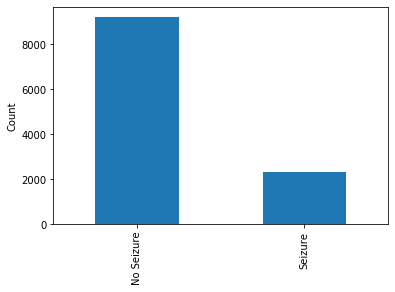

In [13]:
# Visualize class distribution

y.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Seizure', 'Seizure'])
plt.ylabel('Count');

In [14]:
# Standardize data

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# PCA

pca = PCA(n_components=178)
pca.fit(X)
X_pca = pca.transform(X)

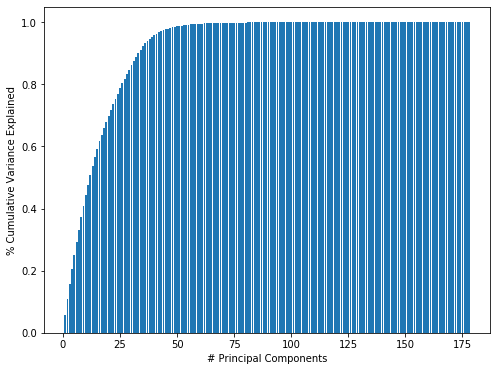

In [16]:
# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,179), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

KNN Classifier Using PCA

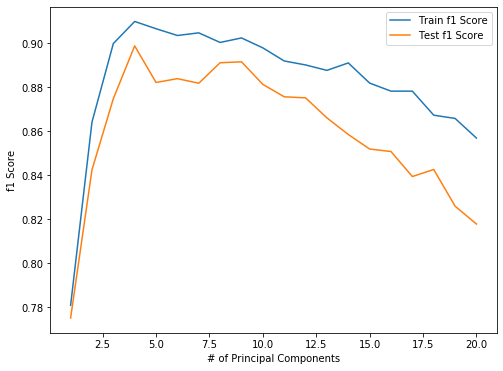

In [17]:
train_f1 = []
test_f1 = []

for i in range(20):
    
    X = X_pca[:,0:i+1]
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), train_f1, label='Train f1 Score')
plt.plot(range(1,21), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

Selection of first for PC's for KNN

In [18]:
 X = X_pca[:,0:4]
    
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.9100210653024376
Test f1 Score: 0.8988970588235294
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2311
         1.0       0.93      0.87      0.90       565

    accuracy                           0.96      2876
   macro avg       0.95      0.93      0.94      2876
weighted avg       0.96      0.96      0.96      2876



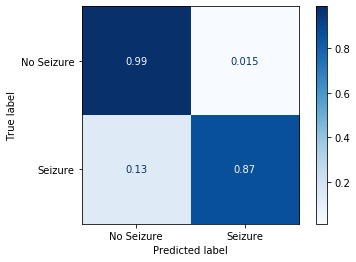

In [19]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No Seizure',
                                                          'Seizure'],
                     normalize='true', cmap='Blues');

KNN using features most correlated to target

In [22]:
# Define X and y

X = df.drop('y', axis=1)
y = df.y

# Loop to select random columns to be used in classifier
random_cols = []

for i in range(4):
    rand_col = 'X' + str(random.randint(1,178))
    random_cols.append(rand_col)
    
print(random_cols)    


['X169', 'X75', 'X48', 'X15']


In [23]:
X = X[random_cols]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.8595194085027726
Test f1 Score: 0.8060548722800379
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2311
         1.0       0.87      0.75      0.81       565

    accuracy                           0.93      2876
   macro avg       0.90      0.86      0.88      2876
weighted avg       0.93      0.93      0.93      2876



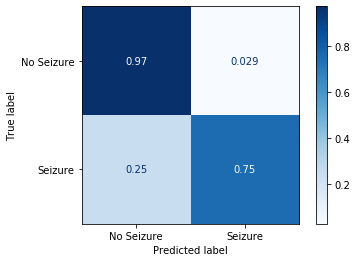

In [24]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No Seizure',
                                                          'Seizure'],
                     normalize='true', cmap='Blues');